In [164]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [165]:
data16=pd.read_excel("AQI 2016 (1).xls")

In [166]:
data17=pd.read_excel("AQI 2017.xlsx")

In [167]:
data18=pd.read_excel("2018_AQI.xlsx")

In [168]:
data19=pd.read_excel("2019_AQI.xlsx")

In [169]:
data20=pd.read_excel("2020_AQI.xlsx")

In [170]:
data21=pd.read_excel("2021_AQI.xlsx")

In [171]:
data22=pd.read_excel("2022_AQI.xlsx")

In [172]:
data22

,Location,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
0,Nizamabad,56,59.000000,64.000000,58.000000,56.222222,54,46.000000,53,54,63,56,59
1,Adilabad,54,55.000000,56.000000,65.000000,60.148148,58,48.000000,56,56,65,58,62
2,"Kuda, warangal",58,64.000000,49.105826,66.173930,53.704530,72,40.428571,43,41,64,49,116
3,"Mee-Seva, Warangal",73,72.514053,76.057747,60.080031,77.094650,85,47.268637,56,48,64,94,94
4,Karimnagar,82,90.333333,95.666667,69.926215,76.241282,89,69.197791,55,58,63,101,126
5,Khammam,80,78.079300,76.518519,79.365731,76.611111,81,72.500000,58,42,57,78,115


# Dataset of Nizamabad

In [173]:
Nizamabad_data=list(data16.T[0][1:-6])+list(data17.T[0][1:-1])+list(data18.T[0][1:])+list(data19.T[0][1:])+list(data20.T[0][1:])+list(data21.T[0][1:])+list(data22.T[0][1:])

dt=Nizamabad_data

dt

[62.333333333333336,
 63.666666666666664,
 66.33333333333333,
 68.33333333333333,
 68.66666666666667,
 38.0,
 56.77777777777778,
 58.22222222222222,
 56.44444444444444,
 64.22222222222223,
 60.111111111111114,
 62,
 61.333333333333336,
 61.55555555555556,
 63.22222222222222,
 67.37037037037038,
 68.40740740740742,
 62.55555555555556,
 57.0,
 59.55555555555556,
 59.44444444444444,
 61.44444444444444,
 61.0,
 58.888888888888886,
 60.6666666666667,
 60.5555555555556,
 66.1111111111111,
 69.7777777777778,
 54.0,
 64.1851851851852,
 58.5555555555556,
 60.0,
 64.2222222222222,
 48.1111111111111,
 59.8148148148148,
 62,
 64.3703703703704,
 60.8888888888889,
 61.1481481481482,
 62.0,
 64.4814814814815,
 68.8888888888889,
 72.0,
 70.5555555555556,
 61.1666666666667,
 69.3333333333333,
 61.7777777777778,
 66.4444444444444,
 64.0,
 63.5555555555556,
 66.4444444444444,
 38.3333333333333,
 50,
 52.0,
 63,
 60.0,
 62,
 62,
 62.5555555555556,
 81.0,
 68.5925925925926,
 68,
 66,
 69,
 41,
 57,
 54,
 4

In [174]:
L=['1-1-2016','1-2-2016','1-3-2016','1-4-2016','1-5-2016','1-6-2016','1-7-2016','1-8-2016','1-9-2016','1-10-2016','1-11-2016','1-12-2016','1-1-2017','1-2-2017','1-3-2017','1-4-2017','1-5-2017','1-6-2017','1-7-2017','1-8-2017','1-9-2017','1-10-2017','1-11-2017','1-12-2017']
L=L+['1-1-2018','1-2-2018','1-3-2018','1-4-2018','1-5-2018','1-6-2018','1-7-2018','1-8-2018','1-9-2018','1-10-2018','1-11-2018','1-12-2018']
L=L+['1-1-2019','1-2-2019','1-3-2019','1-4-2019','1-5-2019','1-6-2019','1-7-2019','1-8-2019','1-9-2019','1-10-2019','1-11-2019','1-12-2019']
L=L+['1-1-2020','1-2-2020','1-3-2020','1-4-2020','1-5-2020','1-6-2020','1-7-2020','1-8-2020','1-9-2020','1-10-2020','1-11-2020','1-12-2020']
L=L+['1-1-2021','1-2-2021','1-3-2021','1-4-2021','1-5-2021','1-6-2021','1-7-2021','1-8-2021','1-9-2021','1-10-2021','1-11-2021','1-12-2021']
L=L+['1-1-2022','1-2-2022','1-3-2022','1-4-2022','1-5-2022','1-6-2022','1-7-2022','1-8-2022','1-9-2022','1-10-2022','1-11-2022','1-12-2022']
L

['1-1-2016',
 '1-2-2016',
 '1-3-2016',
 '1-4-2016',
 '1-5-2016',
 '1-6-2016',
 '1-7-2016',
 '1-8-2016',
 '1-9-2016',
 '1-10-2016',
 '1-11-2016',
 '1-12-2016',
 '1-1-2017',
 '1-2-2017',
 '1-3-2017',
 '1-4-2017',
 '1-5-2017',
 '1-6-2017',
 '1-7-2017',
 '1-8-2017',
 '1-9-2017',
 '1-10-2017',
 '1-11-2017',
 '1-12-2017',
 '1-1-2018',
 '1-2-2018',
 '1-3-2018',
 '1-4-2018',
 '1-5-2018',
 '1-6-2018',
 '1-7-2018',
 '1-8-2018',
 '1-9-2018',
 '1-10-2018',
 '1-11-2018',
 '1-12-2018',
 '1-1-2019',
 '1-2-2019',
 '1-3-2019',
 '1-4-2019',
 '1-5-2019',
 '1-6-2019',
 '1-7-2019',
 '1-8-2019',
 '1-9-2019',
 '1-10-2019',
 '1-11-2019',
 '1-12-2019',
 '1-1-2020',
 '1-2-2020',
 '1-3-2020',
 '1-4-2020',
 '1-5-2020',
 '1-6-2020',
 '1-7-2020',
 '1-8-2020',
 '1-9-2020',
 '1-10-2020',
 '1-11-2020',
 '1-12-2020',
 '1-1-2021',
 '1-2-2021',
 '1-3-2021',
 '1-4-2021',
 '1-5-2021',
 '1-6-2021',
 '1-7-2021',
 '1-8-2021',
 '1-9-2021',
 '1-10-2021',
 '1-11-2021',
 '1-12-2021',
 '1-1-2022',
 '1-2-2022',
 '1-3-2022',
 '1-4-2

In [175]:
df=pd.DataFrame()
df.reset_index()
df["Date"]=L
df["AQI"]=dt
df

,Date,AQI
0,1-1-2016,62.333333
1,1-2-2016,63.666667
2,1-3-2016,66.333333
3,1-4-2016,68.333333
4,1-5-2016,68.666667
...,...,...
79,1-8-2022,53.000000
80,1-9-2022,54.000000
81,1-10-2022,63.000000
82,1-11-2022,56.000000


In [176]:
df1=df[["Date","AQI"]]
df1['Date'] = pd.to_datetime(df1['Date'], format='%m-%d-%Y').dt.strftime('%d-%Y')

df["Date"]=pd.to_datetime(df["Date"])
print(df1)
x=df["Date"]
y=df["AQI"]
#plt.plot(x,y)
df=df.set_index("Date")

       Date        AQI
0   01-2016  62.333333
1   02-2016  63.666667
2   03-2016  66.333333
3   04-2016  68.333333
4   05-2016  68.666667
..      ...        ...
79  08-2022  53.000000
80  09-2022  54.000000
81  10-2022  63.000000
82  11-2022  56.000000
83  12-2022  59.000000

[84 rows x 2 columns]


In [177]:
df1

,Date,AQI
0,01-2016,62.333333
1,02-2016,63.666667
2,03-2016,66.333333
3,04-2016,68.333333
4,05-2016,68.666667
...,...,...
79,08-2022,53.000000
80,09-2022,54.000000
81,10-2022,63.000000
82,11-2022,56.000000


In [178]:
df1["Date"]

0     01-2016
1     02-2016
2     03-2016
3     04-2016
4     05-2016
       ...   
79    08-2022
80    09-2022
81    10-2022
82    11-2022
83    12-2022
Name: Date, Length: 84, dtype: object

# AQI levels of Nizamabad between 2016 and 2022

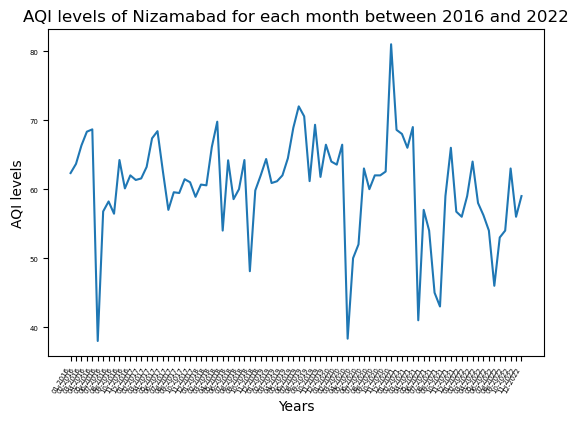

In [179]:
fig, ax = plt.subplots()
ax.plot_date(df1["Date"],df1["AQI"], marker='', linestyle='-')

fig.autofmt_xdate()


plt.title("AQI levels of Nizamabad for each month between 2016 and 2022")
plt.xlabel("Years")
plt.ylabel("AQI levels")

plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_fontsize(5)
plt.show()

In [180]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                random_state=666)

In [181]:
from statsmodels.tsa.stattools import adfuller
dfa=adfuller(df)
print("The p-value of the dataset is",dfa[1])

The p-value of the dataset is 2.0236337723928965e-08


In [182]:
#plt.plot(df)

In [183]:
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
fit=auto_arima(df["AQI"],trace=True,suppress_warning=True)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=574.967, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=577.377, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=569.883, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=571.995, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=930.607, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=570.968, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=571.079, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=572.966, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.007 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -281.942
Date:                Sat, 04 Mar 2023   AIC                            569.883
Time:                        18:41:55   BIC                            577.175
Sample:                             0   HQIC                           572.815
                                 - 84                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     40.5250      7.339      5.522      0.000      26.141      54.909
ar.L1          0.3291      0.118      2.793      0.005       0.098       0.560
sigma2        48.1164      5.695      8.448      0.000      36.953      59.279
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                72.23
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               1.77   Skew:                            -1.35
Prob(H) (two-sided):                  0.14   Kurtosis:                         6.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [184]:
'''df.sort_index(inplace=True)
df'''

'df.sort_index(inplace=True)\ndf'

In [185]:
train=df.iloc[:-12]
test=df.iloc[-12:]

# ARIMA model

In [186]:
from statsmodels.tsa.arima.model import ARIMA 
print(train)
model =ARIMA(train,order=(1,0,0),seasonal_order=(1,1,1,12))
model_fit =model.fit()
model_fit.summary()

                  AQI
Date                 
2016-01-01  62.333333
2016-01-02  63.666667
2016-01-03  66.333333
2016-01-04  68.333333
2016-01-05  68.666667
...               ...
2021-01-08  45.000000
2021-01-09  43.000000
2021-01-10  59.000000
2021-01-11  66.000000
2021-01-12  56.740741

[72 rows x 1 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                AQI   No. Observations:                   72
Model:             ARIMA(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood                -216.371
Date:                            Sat, 04 Mar 2023   AIC                            440.742
Time:                                    18:41:56   BIC                            449.119
Sample:                                         0   HQIC                           444.019
                                             - 72                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2169      0.137      1.581      0.114      -0.052       0.486
ar.S.L12       0.1506      0.364      0.414      0.679      -0.563       0.864
ma.S.L12      -0.9954     25.643     -0.039      0.969     -51.254      49.264
sigma2        58.5045   1483.473      0.039      0.969   -2849.050    2966.059
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                10.58
Prob(Q):                              0.83   Prob(JB):                         0.01
Heteroskedasticity (H):               2.00   Skew:                            -0.56
Prob(H) (two-sided):                  0.13   Kurtosis:                         4.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

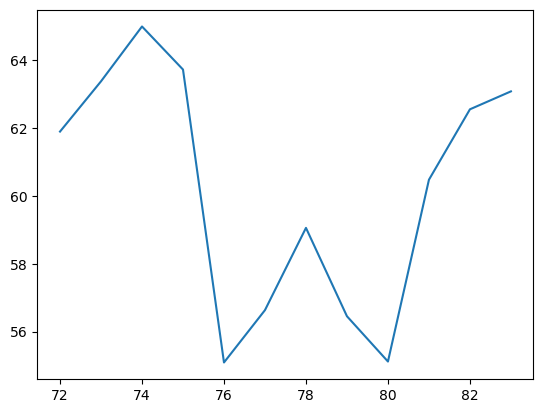

In [187]:
pred_new=model_fit.forecast(12)
plt.plot(pred_new)

In [188]:
#res.index

In [189]:
time_list=['1-1-2022','1-2-2022','1-3-2022','1-4-2022','1-5-2022','1-6-2022','1-7-2022','1-8-2022','1-9-2022','1-10-2022','1-11-2022','1-12-2022']
res=pd.DataFrame(pred_new)
res["Date"]=time_list
a=list(res['predicted_mean'])
res["AQI"]=a
res=res.drop(["predicted_mean"],axis=1)
res["Date"]=pd.to_datetime(res["Date"])
df2=res[["Date","AQI"]]
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%d-%m').dt.strftime('%d-%Y')
res=res.set_index("Date")

In [190]:
final_data =train
pred_data=final_data.append(res)

In [191]:
#df2

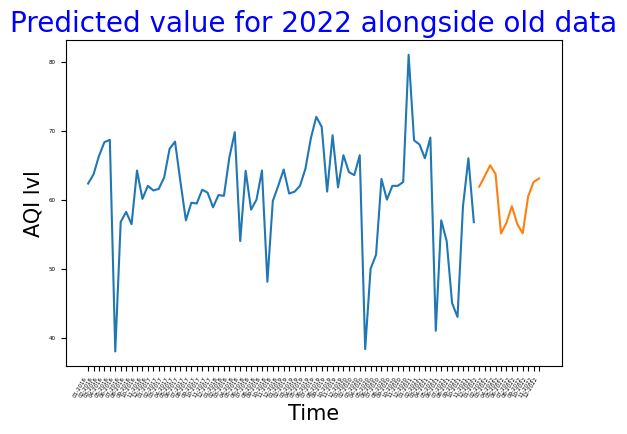

In [200]:
fig, ax = plt.subplots()
ax.plot_date(df1["Date"][:-12],df1["AQI"][:-12], marker='', linestyle='-')
ax.plot_date(df2["Date"],df2["AQI"] ,marker='', linestyle='-')
fig.autofmt_xdate()


plt.title("Predicted value for 2022 alongside old data",fontsize = 20,c='b')
plt.xlabel("Time",fontsize = 15)
plt.ylabel("AQI lvl",fontsize = 15)

plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_fontsize(4)
plt.show()



# Performance of the model

In [193]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred_new,test["AQI"]))
ame=mean_absolute_error(pred_new,test["AQI"])

print("Average Temperature         : ",df['AQI'].mean())
print("Root mean Square value      : ",rmse)
print("Mean absolute Error         : ",ame)

Average Temperature         :  60.409391534391546
Root mean Square value      :  5.363459293900392
Mean absolute Error         :  4.292567249303842


# Forcasting for 2023

In [194]:
model =ARIMA(df,order=(1,0,2),seasonal_order=(9,1,2,12))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              AQI   No. Observations:                   84
Model:             ARIMA(1, 0, 2)x(9, 1, 2, 12)   Log Likelihood                -253.325
Date:                          Sat, 04 Mar 2023   AIC                            536.650
Time:                                  18:43:06   BIC                            570.800
Sample:                                       0   HQIC                           550.245
                                           - 84                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6346      0.843      0.753      0.451      -1.017       2.286
ma.L1         -0.4697      0.798     -0.588      0.556      -2.034       1.095
ma.L2          0.0778      0.369      0.211      0.833      -0.645       0.801
ar.S.L12      -0.1015    320.282     -0.000      1.000    -627.842     627.639
ar.S.L24       0.3496    704.051      0.000      1.000   -1379.565    1380.264
ar.S.L36       0.0992    238.987      0.000      1.000    -468.306     468.505
ar.S.L48       0.1088    241.465      0.000      1.000    -473.153     473.371
ar.S.L60       0.1731    248.703      0.001      0.999    -487.276     487.622
ar.S.L72       0.7383    278.005      0.003      0.998    -544.142     545.618
ar.S.L84      -0.4363    396.235     -0.001      0.999    -777.043     776.171
ar.S.L96      -0.4823    609.323     -0.001      0.999   -1194.734    1193.769
ar.S.L108     -0.0013    291.189  -4.58e-06      1.000    -570.721     570.719
ma.S.L12      -0.0439    668.027  -6.57e-05      1.000   -1309.353    1309.265
ma.S.L24      -0.2846   2207.884     -0.000      1.000   -4327.657    4327.088
sigma2         6.1033   1.07e+04      0.001      1.000    -2.1e+04     2.1e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.07
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                            -0.52
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [195]:
pred_new =model_fit.forecast(12)
print("The predicted AQI values of each month of 2023 is:\n",pd.DataFrame(pred_new))

The predicted AQI values of each month of 2023 is:
     predicted_mean
84       58.533014
85       58.861653
86       61.866185
87       56.566041
88       50.449540
89       78.173005
90       52.434473
91       55.627883
92       57.254471
93       58.441925
94       59.489815
95       60.109325


In [196]:
res=pd.DataFrame(pred_new)
res.columns=["AQI"]
time_list=['1-1-2023','1-2-2023','1-3-2023','1-4-2023','1-5-2023','1-6-2023','1-7-2023','1-8-2023','1-9-2023','1-10-2023','1-11-2023','1-12-2023']
res["AQI"]=pred_new
res["Date"]=time_list
res["Date"]=pd.to_datetime(res["Date"])
res['Date'] = pd.to_datetime(res['Date'], format='%Y-%d-%m').dt.strftime('%d-%Y')
res=res.set_index("Date")
res

,AQI
Date,
01-2023,58.533014
02-2023,58.861653
03-2023,61.866185
04-2023,56.566041
05-2023,50.449540
06-2023,78.173005
07-2023,52.434473
08-2023,55.627883
09-2023,57.254471


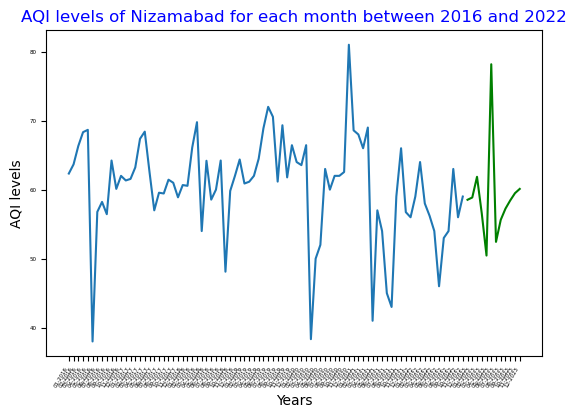

In [197]:
fig, ax = plt.subplots()
ax.plot_date(df1["Date"],y, marker='', linestyle='-')
plt.plot(res,c='g')

fig.autofmt_xdate()


plt.title("AQI levels of Nizamabad for each month between 2016 and 2022",c='b')
plt.xlabel("Years")
plt.ylabel("AQI levels")

plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_fontsize(4)
plt.show()
